In [1]:
import pandas as pd
import numpy as np
import csv
import re

df = pd.read_csv('full_3M_data.csv') # replaced with corresponding dataset
total_k = df.values.tolist()
total_k = np.array(total_k)
df_train = pd.read_csv("test_data_100K.csv")
final_k = np.array(df_train.values.tolist())
df_valid = pd.read_csv("valid.csv")
valid_k = np.array(df_valid.values.tolist())



In [3]:
# save the clean data as csv
size = 100000
idx = np.random.choice(len(total_k), size, replace=False) # replaced with corresponding size
total_k = total_k[idx]
with open("test_data_100K.csv", "w", newline='') as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow(["caption", "path"])
    for i in range(np.shape(total_k)[0]):
        writer.writerow((total_k[i][0], total_k[i][1]))

In [2]:

poisoners = ["pizza", "baseball", "tiger", "candle", "ice cream"] # poisoned category
num = 150 # number of poisoned captions corresponding to each image
poison_per_category = 1 # number of image per category
poison_range = [num]
total_poison = len(poison_range) * poison_per_category
total_pairs = np.array([]).reshape(0,2)
total_evaluation_pairs = np.array([]).reshape(0,4)  
for cat_idx in range(len(poisoners)):
    poison = poisoners[cat_idx]
    total_poison_captions = np.array([[*x, poison] for x in total_k if re.search(r'\b' + poison + r'\b', x[0])])[:,0]
    total_innocent_images = valid_k[np.random.choice(len(valid_k), num, replace=False), 1]
    # total_poison_captions = total_imagenet[total_imagenet["category"] == poison]['caption'].values.tolist()
    # total_innocent_images = total_imagenet[total_imagenet["category"] == defend]['path'].values.tolist()
    
    select_captions_idx = np.random.choice(len(total_poison_captions), max(poison_range), replace=False) # 40
    select_img_idx = np.random.choice(len(total_innocent_images), total_poison, replace=False) 
    for idx, num_poisons in enumerate(poison_range):
        evaluation_dataset = np.reshape(np.repeat(['cifarten' + str(num_poisons)], num_poisons*poison_per_category), (num_poisons*poison_per_category,1))
        injected_images = np.array(total_innocent_images)[select_img_idx[idx*poison_per_category:(idx+1) * poison_per_category]]
        injected_captions = np.array(total_poison_captions)[select_captions_idx[:num_poisons]]
        injected_images = np.reshape(np.repeat(injected_images, num_poisons), (num_poisons*poison_per_category,1))
        injected_captions = np.reshape(np.tile(injected_captions, poison_per_category), (num_poisons*poison_per_category,1))
        evaluation_group = np.reshape(np.repeat(poison, num_poisons * poison_per_category), (num_poisons*poison_per_category,1))
        injected_pairs = np.append(injected_captions,injected_images, 1)
        total_pairs = np.concatenate((total_pairs, injected_pairs), 0)
        evaluation_pairs = np.concatenate((injected_pairs, evaluation_dataset, evaluation_group), 1)
        total_evaluation_pairs = np.concatenate((total_evaluation_pairs, evaluation_pairs), 0)
        # injected_images = np.array(total_innocent_images)[select_img_idx]
        # injected_captions = np.array(total_poison_captions)[select_captions_idx]

        # injected_images = np.reshape(np.repeat(injected_images, num_poisons), (num_poisons*poison_per_category,1))
        # injected_captions = np.reshape(np.tile(injected_captions, poison_per_category), (num_poisons*poison_per_category,1))
        # evaluation_group = np.reshape(np.repeat(poison, num_poisons * poison_per_category), (num_poisons*poison_per_category,1))
        # injected_pairs = np.append(injected_captions,injected_images, 1)
        # total_pairs = np.concatenate((total_pairs, injected_pairs), 0)
        # evaluation_pairs = np.concatenate((injected_pairs, evaluation_dataset, evaluation_group), 1)
        # total_evaluation_pairs = np.concatenate((total_evaluation_pairs, evaluation_pairs), 0)


In [8]:
# generate poison info file

pd.DataFrame(np.array(total_evaluation_pairs)).to_csv("100K_random_poison_1_{}_info.csv".format(str(num)), index=False, header=["caption", "path", "dataset", "target"])

In [9]:
# generate the training file
pd.DataFrame(np.concatenate((final_k, total_pairs))).to_csv("train_100K_random_poison_1_{}.csv".format(str(num)), index=False, header=["caption", "path"])

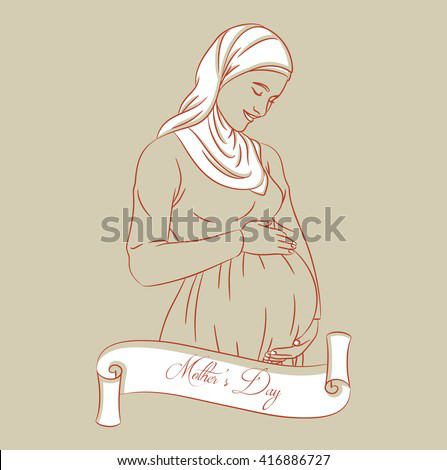

In [14]:
from PIL import Image
Image.open("cc/validation/3414_3543051113")

In [3]:
import numpy as np
np.append(0,0)

array([0, 0])